In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import beta

In [10]:
BANDIT_PROB = [0.2,0.5,0.9] #win rate of 3 bandit of casino
NUM_TRIALS = 10000

In [26]:
#every time posterior become prior and this is how process go on and for every sample
class Bandit:
    def __init__(self,p):
        self.p = p
        self.N = 0 #no of same collected so far
        self.a = 1
        self.b = 1
        
    def pull(self): #draw 1 with probability p
        return np.random.random() < self.p
    
    def update(self,x):
        self.N += 1
        self.a += x    # p(Q/X) = Beta(a+Exi,b+N-Exi) #if u look eq of thomson sampling 
                      # then u see that a is inc by x and every on sample and b is N is 1 and reward x so b become 1-x
        self.b += 1-x
        
    def sampling(self):
        return np.random.beta(self.a,self.b)

In [34]:
def plot(bandit,trial):
    x = np.linspace(0,1,200) #xaxis
    for b in bandit:
        y = beta.pdf(x,b.a,b.b)
        plt.plot(x,y,label=f"real p: {b.p:4f}, winrate = {b.a-1}/{b.N}")
    plt.title(f'bandit dis. after {trial} trails')
    plt.legend()
    plt.show()

In [30]:
def experiment(sample_pnts):
    bandit = [Bandit(p) for p in BANDIT_PROB]
    reward = np.zeros(NUM_TRIALS)
    optimal_j = np.argmax([b.p for b in bandit])
    print("optimal j::",optimal_j)
    
    for  i in range(NUM_TRIALS):
        j = np.argmax([b.sampling() for b in bandit])
        
        if i in sample_pnts:
            plot(bandit,i)
        
        x = bandit[j].pull() #pull arm of bandit with the largest sample
        
        reward[i] = x    #collect reward
        
        bandit[j].update(x)   #update the distribution whose arm just pulled
        
    #print reward
    print('total reward earned: ',reward.sum())
    print('win rate: ',reward.sum()/NUM_TRIALS)
    print('no of times every bandit arm pulled',[b.N for b in bandit])
    #plot the result
    cum_reward = np.cumsum(reward)
    win_rate = cum_reward/(np.arange(NUM_TRIALS)+1)
    plt.ylim([0,1])
    plt.plot(win_rate)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROB))
    plt.show()

optimal j:: 2


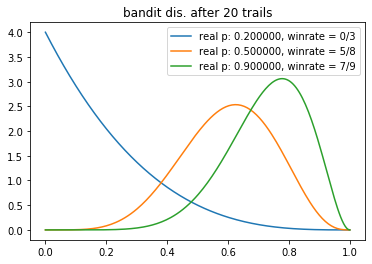

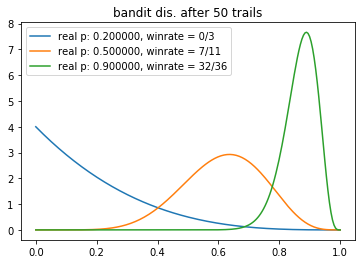

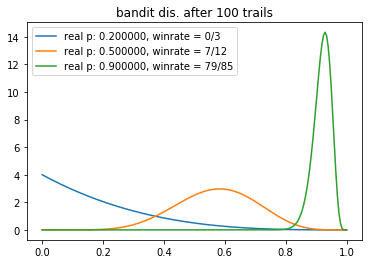

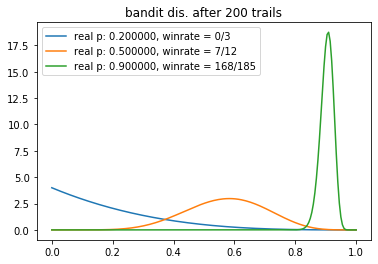

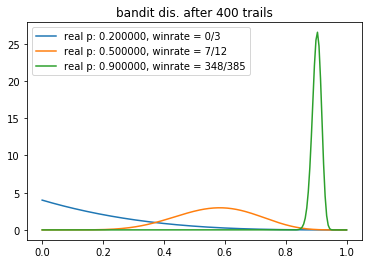

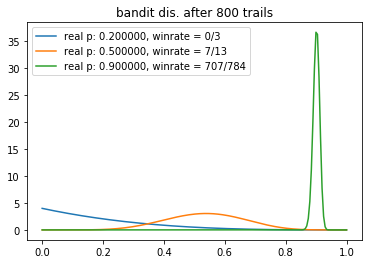

total reward earned:  9005.0
win rate:  0.9005
no of times every bandit arm pulled [4, 14, 9982]


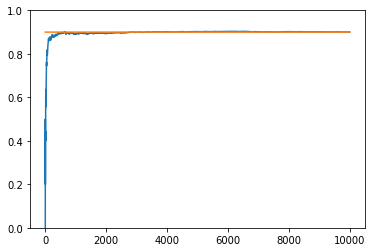

In [32]:
experiment([20,50,100,200,400,800])